# PROJECT NUMERICAL ANALYSIS 2023 
## Karatis Dimitrios


# <font color = 'red'> <u> PART A:</u> </font>

## Creating and testing QR and LU decomposition methods.

In [1]:
import numpy as np

def LUmine(A):
    # Convert matrix A into float type.
    A = A.astype(float)
    # The dimention of the nxn square matrix A I want to factorize.
    n = A.shape[0]
    # Initialize the lower triangular matrix L as an identity matrix.
    L = np.identity(n)
    # Initialize the upper triangular matrix U using the same values as A.
    U = A
    for j in range(0,n-1):
        for i in range(j+1,n):
            # Find the suitable coefficient in order to execute the corresponding elementary row operation
            # needed to implement gauss elimination method.
            mult = A[i,j] / A[j,j]
            A[i,j+1:n] = A[i,j+1:n] - mult * A[j,j+1:n]
            U[i,j+1:n] = A[i,j+1:n]
            # Initialize the matrix L using the previously found coefficient.
            L[i,j] = mult
            # Lastly, set all the none initialized entries of matrix U equal to zero.
            U[i,j] = 0
    # Return the requested lower and upper triangular matrices L and U.
    return L,U

<font size="4">Code to test LUmine function using np.linalg.norm() method.</font>

In [2]:
A = np.array([[1, 2, 1], [3, 4, 2],[2, 5, 1]])
L,U = LUmine(A)
print(L)
print("\n")
print(U)
print("\n")
# Print the absolute "difference" between A and L * U matrix.
# Ideally it should be equal to zero.
print(np.linalg.norm(A - L @ U))

[[ 1.   0.   0. ]
 [ 3.   1.   0. ]
 [ 2.  -0.5  1. ]]


[[ 1.   2.   1. ]
 [ 0.  -2.  -1. ]
 [ 0.   0.  -1.5]]


0.0


In [3]:
import numpy as np

def QRmine(A):
    # Convert matrix A into float type.
    A = A.astype(float)
    # The dimention of the nxn square matrix A I want to decompose.
    n = A.shape[0]
    # Initialize the orthogonal matrix Q with zeros.
    Q = np.zeros((n,n))
    for j in range(n):
        # At the beggining of each iteration, set the u vector equal to the jth column of matrix A.
        u = A[:,j]
        for i in range(j):
            # Modify the vector u accordingly.
            length_of_leg = np.sum(A[:,j].T @ Q[:,i])
            u = u - (length_of_leg * Q[:,i])
        # Initializing the columns of matrix Q using the unit vector.
        Q[:,j] = u / np.linalg.norm(u)
    # Lastly get the R matrix using the formula: R = INVERSE(Q) * A.
    R = np.linalg.inv(Q) @ A
    return Q,R

<font size="4"> Code to test QRmine function using np.linalg.norm() method. </font>

In [4]:
A = np.array([[1, 2, 1], [3, 4, 2],[2, 5, 1]])
Q,R = QRmine(A)
print(Q)
print("\n")
print(R)
print("\n")
# Print the absolute "difference" between A and Q * R matrix." 
# Ideally it should be equal to zero.
print(np.linalg.norm(A - Q @ R))

[[ 0.26726124  0.14547859  0.95257934]
 [ 0.80178373 -0.58191437 -0.13608276]
 [ 0.53452248  0.80013226 -0.27216553]]


[[ 3.74165739e+00  6.41426981e+00  2.40535118e+00]
 [ 0.00000000e+00  1.96396101e+00 -2.18217890e-01]
 [ 1.11022302e-16  0.00000000e+00  4.08248290e-01]]


5.874748045952207e-16


## (a) Creating and testing a function that constructs hilbert matrices.

In [5]:
# Creating a function to construct a Hilbert matrix.  
def hilbert(n):
    # Create a nxn matrix full of zeros.
    H = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            H[i,j] = 1 / (i + j +1)
    return H  

In [6]:
print(hilbert(4))
print("\n")
print(hilbert(3))

[[1.         0.5        0.33333333 0.25      ]
 [0.5        0.33333333 0.25       0.2       ]
 [0.33333333 0.25       0.2        0.16666667]
 [0.25       0.2        0.16666667 0.14285714]]


[[1.         0.5        0.33333333]
 [0.5        0.33333333 0.25      ]
 [0.33333333 0.25       0.2       ]]


## (b) Creating functions to solve a generic Ax=b system, using LU and QR decomposition.

In [7]:
# Computing the solution vector y by solving Ly = b.
def forward_sub(L, b):
    y = np.zeros(len(b))
    for i in range(len(b)):
        y[i] = b[i]
        for j in range(i):
            y[i] = y[i] - (L[i, j] * y[j])
        y[i] = y[i] / L[i, i]
    return y    

In [8]:
# Computing the solution vector x by solving Ux = y.
def backward_sub(U, y):
    x = np.zeros(len(y))
    for i in range(len(y), 0, -1):
        x[i-1] = (y[i-1] - np.dot(U[i-1, i:], x[i:])) / U[i-1, i-1]
    return x

In [9]:
# Finally solving the system using LU factorization.
def solve_Axb_LU(H,b):
    L,U = LUmine(H)
    y = forward_sub(L,b)
    x = backward_sub(U,y)
    return x

In [10]:
b = np.array([6,-4,27])
A = np.array([[1,7,1],[3,2,5],[1,8,-7]])

print(solve_Axb_LU(A,b))

[ 2.26        0.89333333 -2.51333333]


In [11]:
# Solving the system using QR factorization.
def solve_Axb_QR(A,b):
    Q,R = QRmine(A)
    k =  np.linalg.inv(Q) @ b
    x = backward_sub(R,k)
    return x

In [12]:
b = np.array([6,-4,27])
A = np.array([[1,7,1],[3,2,5],[1,8,-7]])

print(solve_Axb_QR(A,b))

[ 2.26        0.89333333 -2.51333333]


## Solving the system Hx=b , where b: a 1xn vector populated with the numerical value of 1.

In [13]:
# Solving the system Hx=b using LU decomposition method.
# For n, a nxn hilbert matrix H and a 1xn vector b, populated with the numerical value of one.
def solve_Hxb_LU(n):
    b = np.ones((n,1))
    H = hilbert(n)
    x = solve_Axb_LU(H,b)
    return x

In [14]:
n = 3
x = solve_Hxb_LU(3)
print(x)

[  3. -24.  30.]


<font size="3"> (c) By making a minuscule adjustment to the initial values of vector b, we see that the result provided by the computer remains the same as before. This phenomenon can partially be attributed to the utilization of floating-point arithmetic and approximations that machines use. </font>

In [15]:
# Solving the system Hx=b using LU decomposition method.
# For n, a nxn hilbert matrix H and a 1xn vector b, populated with the numerical value of one.
def solve_Hxbnew_LU(n):
    b = np.ones((n,1))
    # Change the first value of vector b ever so slightly.
    bnew = b
    bnew[0] = 1 + 10**(-15)
    H = hilbert(n)
    xnew = solve_Axb_LU(H,bnew)
    return xnew

In [16]:
n = 3
xnew = solve_Hxbnew_LU(n)
print(xnew)

[  3. -24.  30.]


In [17]:
# Function to calculate the difference between x and xnew.
def error_x_xnew(x,xnew):
    return np.max(np.abs(np.subtract(x,xnew)))

<font size="3"> Although we get the same x value as before (x = xnew), by calculating the max absolute value of the difference between the two vectors, x and xnew, we can see that the result isn't zero as we might've expected but rather a really small number, close to zero, but never actually zero. </font>

In [18]:
# Printing the 'error', specifically the differnce between x and xnew, 
# using LU factorization method for values of n that are considered 'small'.
print(error_x_xnew(x,xnew))

2.1316282072803006e-14


In [19]:
# Solving the system Hx=b using QR decomposition method.
# For n, a nxn hilbert matrix H and a 1xn vector b, populated with the numerical value of one.
def solve_Hxb_QR(n):
    b = np.ones((n,1))
    H = hilbert(n)
    x = solve_Axb_QR(H,b)
    return x

In [20]:
n = 3
x = solve_Hxb_QR(3)
print(x)

[  3. -24.  30.]


In [21]:
# Solving the system Hx=b using QR decomposition method.
# For n, a nxn hilbert matrix H and a 1xn vector b, populated with the numerical value of one.
def solve_Hxbnew_QR(n):
    b = np.ones((n,1))
    # Change the first value of vector b ever so slightly.
    bnew = b
    bnew[0] = 1 + 10**(-15)
    H = hilbert(n)
    xnew = solve_Axb_QR(H,bnew)
    return xnew

In [22]:
n = 3
xnew = solve_Hxbnew_QR(n)
print(xnew)

[  3. -24.  30.]


In [23]:
# Printing the 'error', specifically the differnce between x and xnew, 
# using QR factorization method for values of n that are considered 'small'.
print(error_x_xnew(x,xnew))

6.394884621840902e-14


<font size="3"> As we can see, for small values of n, solving the system using both LU and QR methods yields very similar reuslts. </font>

<font size="3"> What will happen if the number of rows and columns of matrix H becomes 100? 
Will the previous results hold true in that case? </font>

In [24]:
# Solving the system Hx=b using LU decomposition method.
# For n=100, a 100x100 hilbert matrix H and a 1x100 vector b, populated with the numerical value of one.
n = 100
x = solve_Hxb_LU(n)
print(x)

[ 1.48299679e+01 -2.60459035e+03  1.08702648e+05 -1.85459812e+06
  1.55054203e+07 -6.43562142e+07  9.04429900e+07  2.55199804e+08
 -1.11212015e+09  7.80883040e+08  2.79174137e+09 -6.01833936e+09
  3.41507355e+09  1.60226177e+08  1.04767044e+09 -1.18145274e+09
 -8.22012345e+08  8.63368422e+08 -4.18576653e+07 -3.20323150e+09
  3.10904534e+09  4.66326547e+07  3.26630496e+09 -9.94693833e+08
 -1.87949135e+09 -2.56098970e+09  3.25260046e+08 -2.60952873e+09
  3.75288533e+09  2.10173080e+09 -6.47292177e+09  1.03997537e+10
 -1.27766157e+08  9.59240181e+08 -7.41617562e+09 -1.94634236e+09
  2.29245085e+09 -8.30953570e+08  1.14754870e+09 -6.25253005e+09
  1.55374873e+09  1.73041518e+09  4.69353288e+09  2.90662022e+09
 -6.28594814e+08  3.37239424e+09 -4.36904264e+09  1.99791892e+09
 -1.19805089e+09 -6.21013176e+09 -1.17716240e+09  2.80524804e+09
  1.69178569e+09 -7.40053222e+09  2.82387784e+09  3.77789834e+09
  3.73098579e+09  2.95246331e+09 -2.84021543e+09 -8.15699488e+09
 -4.22016162e+09 -1.23560

In [25]:
xnew = solve_Hxbnew_LU(n)
print(xnew)

[ 1.48299732e+01 -2.60459066e+03  1.08702655e+05 -1.85459820e+06
  1.55054207e+07 -6.43562150e+07  9.04429862e+07  2.55199829e+08
 -1.11212021e+09  7.80883112e+08  2.79174133e+09 -6.01833935e+09
  3.41507357e+09  1.60226134e+08  1.04767040e+09 -1.18145263e+09
 -8.22012402e+08  8.63368490e+08 -4.18578168e+07 -3.20323141e+09
  3.10904532e+09  4.66327327e+07  3.26630489e+09 -9.94693921e+08
 -1.87949128e+09 -2.56098967e+09  3.25260043e+08 -2.60952859e+09
  3.75288523e+09  2.10173069e+09 -6.47292165e+09  1.03997536e+10
 -1.27766195e+08  9.59240144e+08 -7.41617559e+09 -1.94634233e+09
  2.29245076e+09 -8.30953634e+08  1.14754881e+09 -6.25252995e+09
  1.55374878e+09  1.73041524e+09  4.69353281e+09  2.90662028e+09
 -6.28594873e+08  3.37239412e+09 -4.36904266e+09  1.99791881e+09
 -1.19805080e+09 -6.21013191e+09 -1.17716231e+09  2.80524811e+09
  1.69178562e+09 -7.40053203e+09  2.82387763e+09  3.77789854e+09
  3.73098573e+09  2.95246325e+09 -2.84021540e+09 -8.15699475e+09
 -4.22016157e+09 -1.23560

In [26]:
# Printing the 'error', specifically the differnce between x and xnew, 
# using LU factorization method for values of n that are considered 'big'.
print(error_x_xnew(x,xnew))

263.5235843658447


In [27]:
# Solving the system Hx=b using QR decomposition method.
# For n=100, a 100x100 hilbert matrix H and a 1x100 vector b, populated with the numerical value of one.
n = 100
x = solve_Hxb_QR(n)
print(x)

[-2.56372654e+06 -2.61601955e+06  2.19218438e+07 -5.64821931e+05
  3.98051046e+06 -2.12218476e+08  3.97984466e+08 -1.24090647e+08
 -2.08300796e+07  5.02380046e+07 -1.16977208e+08  9.02246213e+06
 -5.41921009e+06  4.16963087e+07 -3.49267062e+07 -5.39344304e+06
 -2.63821278e+07 -3.59229721e+07 -4.16717818e+08  5.95089588e+08
 -1.74739265e+08  8.98901759e+07 -1.27909322e+08 -8.22645220e+07
  2.35810115e+08  1.56743489e+06  1.58415995e+07 -6.65486820e+07
  2.81749024e+07 -6.54353706e+06 -2.29141139e+07  6.16615739e+07
 -5.83548671e+07  4.06301847e+08 -3.14357375e+08 -1.91213729e+08
  1.26975823e+08  5.50706241e+07 -8.33707088e+07 -1.78116118e+07
  2.45917318e+08 -8.60554748e+07 -1.83915330e+08  9.35297248e+07
  3.04724322e+07 -7.22024461e+07 -4.46302310e+07  1.26289986e+07
 -2.20339355e+07  2.23257569e+07  1.63292441e+08 -3.36325623e+08
  2.24997638e+08 -2.25873579e+09  2.43693391e+09 -1.29712514e+08
 -2.45752411e+07 -1.61720744e+08  1.36719375e+08  8.37358229e+07
  1.62705941e+09 -1.16909

In [28]:
xnew = solve_Hxbnew_QR(n)
print(xnew)

[-2.56372654e+06 -2.61601955e+06  2.19218438e+07 -5.64821931e+05
  3.98051046e+06 -2.12218476e+08  3.97984466e+08 -1.24090647e+08
 -2.08300796e+07  5.02380046e+07 -1.16977208e+08  9.02246213e+06
 -5.41921009e+06  4.16963087e+07 -3.49267062e+07 -5.39344304e+06
 -2.63821278e+07 -3.59229721e+07 -4.16717818e+08  5.95089588e+08
 -1.74739265e+08  8.98901759e+07 -1.27909322e+08 -8.22645220e+07
  2.35810115e+08  1.56743489e+06  1.58415995e+07 -6.65486820e+07
  2.81749024e+07 -6.54353706e+06 -2.29141139e+07  6.16615739e+07
 -5.83548671e+07  4.06301847e+08 -3.14357375e+08 -1.91213729e+08
  1.26975823e+08  5.50706241e+07 -8.33707088e+07 -1.78116118e+07
  2.45917318e+08 -8.60554748e+07 -1.83915330e+08  9.35297248e+07
  3.04724322e+07 -7.22024461e+07 -4.46302310e+07  1.26289986e+07
 -2.20339355e+07  2.23257569e+07  1.63292441e+08 -3.36325623e+08
  2.24997638e+08 -2.25873579e+09  2.43693391e+09 -1.29712514e+08
 -2.45752411e+07 -1.61720744e+08  1.36719375e+08  8.37358229e+07
  1.62705941e+09 -1.16909

In [29]:
# Printing the 'error', specifically the differnce between x and xnew, 
# using QR factorization method for values of n that are considered 'big'.
print(error_x_xnew(x,xnew))

0.0


<font size="3"> Observing the presented information, while the two methods produce almost identical results for small values of n, things change as n gets bigger. Based on the above observations, QR method's error when n was equal to one hundred was zero, or almost zero, while LU's error was approximately 263.  Therefore, it's safe to say that QR method is more stable and yields results that exhibit greater accuracy irrespective of the value of n.</font>

<font size="3"> (d) This conclusion can be dipicted better via the help of matplotlib.pyplot python package as seen below. </font>

In [30]:
import matplotlib.pyplot as plt

# Function to annotate the maximum y value and the corresponding x.
def annot_max(x,y, ax=None):
    xmax = x[0,np.argmax(y)]
    ymax = y.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=dict(facecolor='black', shrink=0.15))
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

In [31]:
import matplotlib.pyplot as plt

# Function to create the plot using LU factorization. On x axis we have the dimention n of the hilbert matrix H, 
# and on the y axis the maximum absolute value of the difference between the two vectors, x and xnew, as we did before.
def plot_xY_nNormHxb_LU(n):
    plt.title('PLOT A: Using LU method')
    font1 = {'family':'serif','color':'blue','size':18}
    plt.ylabel('Max (|x - xnew|)',fontdict = font1)
    plt.xlabel('n',fontdict = font1)
    
    xpoints = np.zeros((1,n))
    ypoints = np.zeros((1,n))

    for i in range(n):
        xpoints[0,i] = i+1
        x = solve_Hxb_LU(i+1)
        xnew = solve_Hxbnew_LU(i+1)
        ypoints[0,i] = np.max(np.abs(np.subtract(x,xnew)))
    
    plt.plot(xpoints, ypoints)
    annot_max(xpoints, ypoints)

    x_min = xpoints[0]
    y_min = ypoints[0]
    plt.plot(x_min, y_min, marker='o')
    plt.grid()
    plt.show()

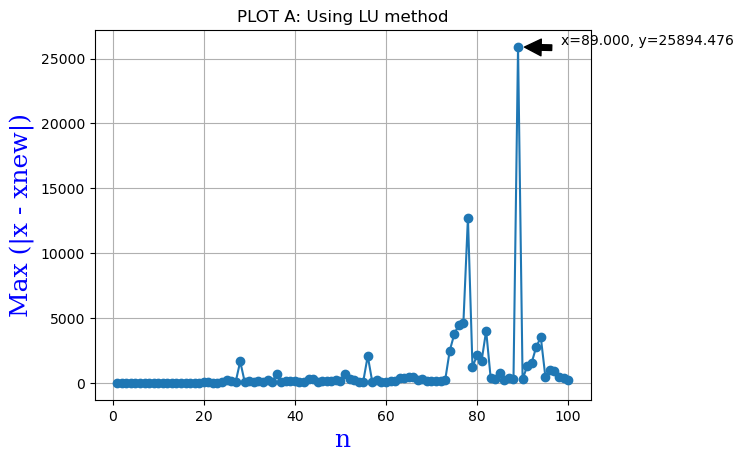

In [32]:
n = 100
plot_xY_nNormHxb_LU(n)

In [33]:
import matplotlib.pyplot as plt

# Function to create the plot using QR factorization. On x axis we have the dimention n of the hilbert matrix H, 
# and on the y axis the maximum absolute value of the difference between the two vectors, x and xnew, as we did before.
def plot_xY_nNormHxb_QR(n):
    plt.title('PLOT B: Using QR method')
    font1 = {'family':'serif','color':'blue','size':18}
    plt.ylabel('Max (|x - xnew|)',fontdict = font1)
    plt.xlabel('n',fontdict = font1)
    
    xpoints = np.zeros((1,n))
    ypoints = np.zeros((1,n))

    for i in range(n):
        xpoints[0,i] = i+1
        x = solve_Hxb_QR(i+1)
        xnew = solve_Hxbnew_QR(i+1)
        ypoints[0,i] = np.max(np.abs(np.subtract(x,xnew)))
    
    plt.plot(xpoints, ypoints)
    annot_max(xpoints, ypoints)

    x_min = xpoints[0]
    y_min = ypoints[0]
    plt.plot(x_min, y_min, marker='o')
    plt.grid()
    plt.show()

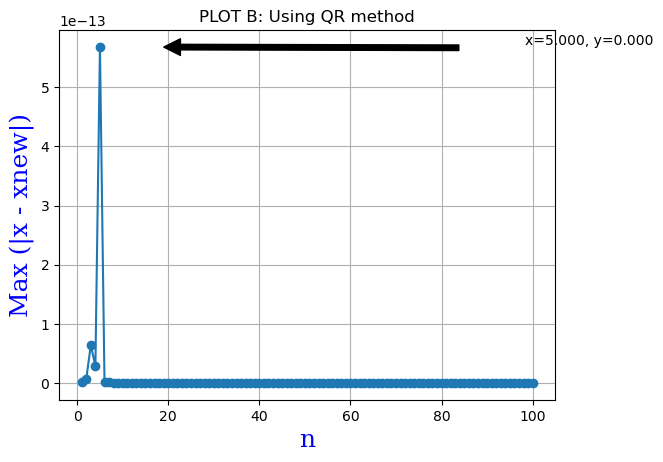

In [34]:
n = 100
plot_xY_nNormHxb_QR(n)

## (e) Calculating the difference between identity matrix I and H*inv(H) for varying values of n.

In [35]:
# For n=3, a 3x3 hilbert matrix H and a 3x3 identity matrix I.
n = 3
x = np.identity(n)
print(x)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [36]:
xnew = hilbert(n) @ np.linalg.inv(hilbert(n))
print(xnew)

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 8.88178420e-16  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -7.10542736e-15  1.00000000e+00]]


In [37]:
print(np.linalg.norm(np.subtract(x,xnew)))

1.0087767680389479e-14


In [38]:
# For n=100, a 100x100 hilbert matrix H and a 100x100 identity matrix I.
n = 100
x = np.identity(n)
print(x)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [39]:
xnew = hilbert(n) @ np.linalg.inv(hilbert(n))
print(xnew)

[[ 9.99999933e-01 -2.88354882e-05 -6.88552488e-04 ...  1.84375000e+00
   6.96875000e+00  7.87109375e+00]
 [ 6.84861810e-08  9.99997096e-01 -5.02010171e-04 ...  4.16406250e+00
   1.55312500e+01  5.95703125e+00]
 [ 1.63201924e-07 -5.22342328e-06  1.00074282e+00 ...  3.32812500e+00
   5.62500000e-01  1.62890625e+00]
 ...
 [ 4.64248942e-09  2.30406905e-06  3.80268791e-08 ...  1.22656250e+00
   1.48437500e+00 -5.60546875e-01]
 [-2.71140026e-08 -9.20815207e-07 -2.30143009e-04 ... -1.52343750e+00
   1.07812500e+00 -1.12109375e+00]
 [-1.49617069e-08  3.58934948e-06 -3.52039877e-04 ... -1.31250000e+00
   2.84375000e+00  4.49218750e-01]]


In [40]:
print(np.linalg.norm(np.subtract(x,xnew)))

262.48377200586737


<font size="3"> As we can see, as the number n increases, the value of the norm between the two vectors, x and xnew, increases as well. </font>

In [41]:
import matplotlib.pyplot as plt

# Function to create the plot:
# At x axis we have the dimention of the hilbert and identity matrices H and I, n
# and on the y axis the value of the norm between two vectors, x and xnew.
def plot_xY_nNormHinvA(n):
    plt.title('PLOT B')
    font1 = {'family':'serif','color':'blue','size':18}
    plt.ylabel('Norm (I - HH^-1)',fontdict = font1)
    plt.xlabel('n',fontdict = font1)
    
    xpoints = np.zeros((1,n))
    ypoints = np.zeros((1,n))

    for i in range(n):
        xpoints[0,i] = i+1
        x = np.identity(i+1)
        xnew = hilbert(i+1) @ np.linalg.inv(hilbert(i+1))
        ypoints[0,i] = np.linalg.norm(np.subtract(x,xnew))
    
    plt.plot(xpoints, ypoints)
    annot_max(xpoints, ypoints)

    x_min = xpoints[0]
    y_min = ypoints[0]
    plt.plot(x_min, y_min, marker='o')
   
    plt.grid()
    plt.show()

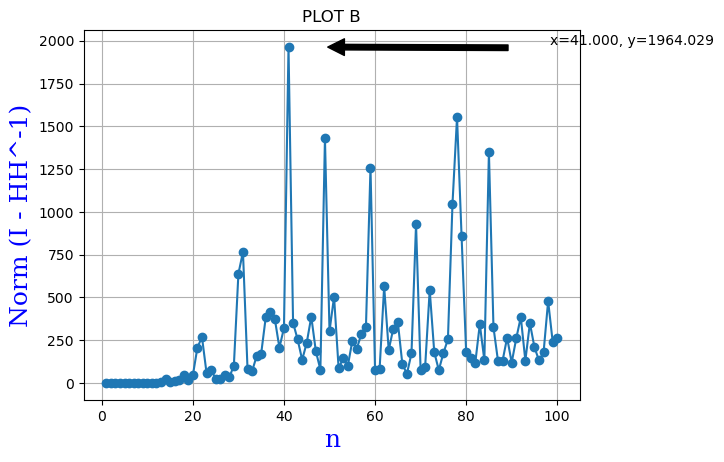

In [42]:
n = 100
plot_xY_nNormHinvA(n)

# <font color = 'red'> <u> PART B:</u> </font>

## Constructing a fourth-degree polynomial that optimally approximates the function:      
## y = cos(4t) + 0, 1e(t), using 50 equidistant points ranging between 0 and 1.

<font size="3"> e(t): a function that generates white noise values based on the Normal distribution. </font>

In [43]:
# Creating a 4th degree polynomial.
def fourth_deg_poly(x, a, b, c, d, e):
    y = a + b*x + c*(x**2) + d*(x**3) + e*(x**4)
    return y

In [44]:
from scipy import optimize

# Using scipy.optimize package to find the values of the coefficients so that the poly optimally approximates the function y.
def least_squares(t,y):    
    alpha = optimize.curve_fit(fourth_deg_poly, xdata = t, ydata = y)[0]
    return alpha

In [45]:
# Plotting the results.
def plot_poly(t,y):
    alpha = least_squares(t,y)
    font1 = {'family':'serif','color':'blue','size':18}
    plt.figure(figsize = (10,8))
    plt.plot(t, y, 'b.')
    plt.plot(t, alpha[0] + alpha[1]*t + alpha[2]*(t**2) + alpha[3]*(t**3) + alpha[4]*(t**4), 'r')
    plt.xlabel('t',fontdict = font1)
    plt.ylabel('y = cos(4t) + 0, 1e(t)',fontdict = font1)

[  1.01079651  -0.12346927 -10.12261923  10.26474742  -1.64771284]


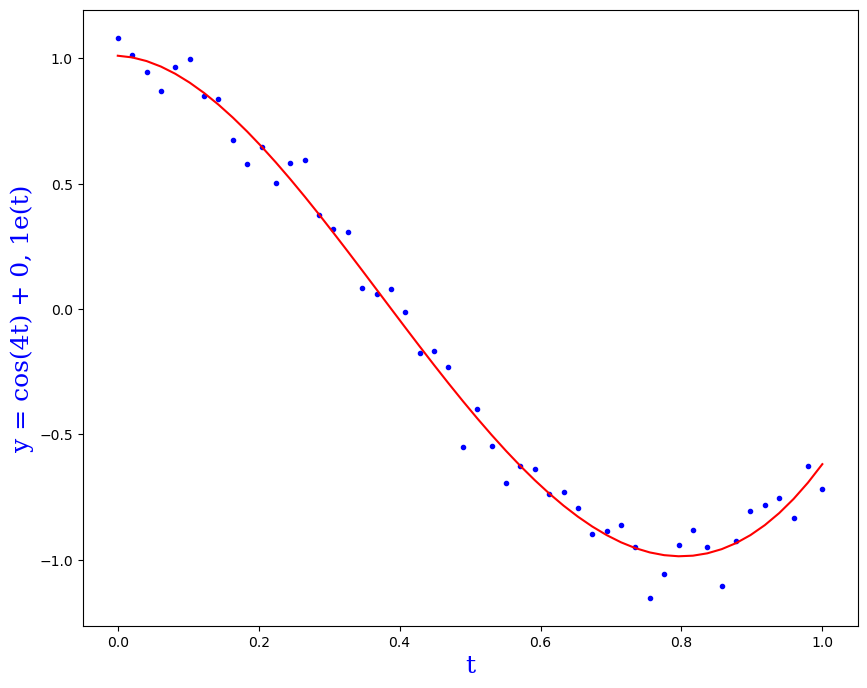

In [46]:
# Creating the values for (t,y(t)), where y = cos(4t) + 0,1e(t). Printing and plotting the results.
t = np.linspace(0,1,num = 50)
y = np.cos(4*t) + 0.1 * np.random.randn(t.shape[0])
print(least_squares(t,y))
plot_poly(t,y)

In [47]:
# Constructing a function that calculates the least squares error based on the: r(x)**2 = ||b - Ax||**2,
# where r is the error.
def least_squares_error(polyDeg,t,y):
    alpha = least_squares(t,y)
    x = alpha[0]
    for i in range(1,polyDeg+1):
        x = x + alpha[i]*(t**i)
    r = (np.linalg.norm(np.abs(y - x)))**2
    return r    

In [48]:
polyDeg = 4
t = np.linspace(0,1,num = 50)
y = np.cos(4*t) + 0.1 * np.random.randn(t.shape[0])
print(least_squares_error(polyDeg,t,y))

0.5834846870708913


## Finding the answer to the same problem ''manually'', using least squares method, by solving the system: trans(A)*A = trans(A)*b, using LU and QR decomposition.

In [49]:
# Creating matrix A and b.
def matrix_A_b(polyDeg,t,y):
    A = np.ones((len(t),polyDeg+1))
    b = np.zeros((len(t),1))
    for j in range(1,polyDeg+1):
        for i in range(len(t)):
            A[i,j] = (t[i])**j
    b = y
    return A,b            

In [50]:
# Finding the values of the coefficients so that the poly optimally approximates the function y,
# by solving: trans(A)*A = trans(A)*b with LU method.
def least_squares_manually_LU(polyDeg,t,y):
    A,b = matrix_A_b(polyDeg,t,y)
    C = np.transpose(A) @ A
    b = np.reshape(b,(len(b),1))
    d = np.transpose(A) @ b
    alpha = solve_Axb_LU(C,d)
    return alpha

In [51]:
# Finding the values of the coefficients so that the poly optimally approximates the function y,
# by solving: trans(A)*A = trans(A)*b with QR method.
def least_squares_manually_QR(polyDeg,t,y):
    A,b = matrix_A_b(polyDeg,t,y)
    C = np.transpose(A) @ A
    b = np.reshape(b,(len(b),1))
    d = np.transpose(A) @ b
    beta = solve_Axb_QR(C,d)
    return beta

In [52]:
# Constructing a function that calculates the least squares error based on the: r(x)**2 = ||b - Ax||**2,
# using LU method, where r is the error.
def least_squares_error_manually_LU(polyDeg,alpha,y):
    x = alpha[0]
    for i in range(1,polyDeg+1):
        x = x + alpha[i]*(t**i)
    r = (np.linalg.norm(np.abs(y - x)))**2
    return r

In [53]:
# Constructing a function that calculates the least squares error based on the: r(x)**2 = ||b - Ax||**2,
# using QR method, where r is the error.
def least_squares_error_manually_QR(polyDeg,beta,y):
    x = beta[0]
    for i in range(1,polyDeg+1):
        x = x + beta[i]*(t**i)
    r = (np.linalg.norm(np.abs(y - x)))**2
    return r

In [54]:
# Testing the functions above: 
polyDeg = 4
t = np.linspace(0,1,num = 50)
y = np.cos(4*t) + 0.1 * np.random.randn(t.shape[0])

# Using LU decomposition method.
alpha = least_squares_manually_LU(polyDeg,t,y)
print(alpha)
print(least_squares_error_manually_LU(polyDeg,alpha,y))

print("\n")

# Using QR decomposition method.
beta = least_squares_manually_QR(polyDeg,t,y)
print(beta)
print(least_squares_error_manually_QR(polyDeg,beta,y))

[ 1.06690688 -1.25278261 -5.2601941   3.39329874  1.36001892]
0.44137069332716156


[ 1.06690688 -1.25278261 -5.2601941   3.39329874  1.36001892]
0.441370693327162


<font size="3"> As we can see the error between the two methods differs ever so slightly. </font>